### Analyzing The Results of Running Short Burst - GA

#### Import the required libraries

In [227]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

#### Retrieve the data from the npy files

In [228]:
def get_state_runs(state, iters, thresholds, min_col="BVAP", ls=[]):
    results = {}

    for threshold in thresholds:
        for l in ls:
            file_pattern = "./output/short-burst/sb-runs/{}_dists14_{}_opt_{:.1%}_{}_sbl{}_score_num_opportunity_dists_*.npy".format(state, min_col, threshold, iters, l)

            sb_runs = glob.glob(file_pattern)

            if not sb_runs:
                print(f"No files found for l = {l} and threshold = {threshold}")
                continue

            try:
                data = [np.load(run) for run in sb_runs]
                results[f"{l}"] = np.array(data)
            except Exception as e:
                print(f"Error loading data for l = {l} and threshold = {threshold}: {e}")

    return results

In [257]:
ga_runs_bvap50 = get_state_runs("GA", iters=500, thresholds=[0.5], min_col="BVAP", ls=[10])
ga_runs_bvap45 = get_state_runs("GA", iters=500, thresholds=[0.45], min_col="BVAP", ls=[10])
ga_runs_bvap40 = get_state_runs("GA", iters=500, thresholds=[0.4], min_col="BVAP", ls=[10])

ga_runs_bvap50i1000l25 = get_state_runs("GA", iters=1000, thresholds=[0.5], min_col="BVAP", ls=[25])
ga_runs_bvap45i1000l25 = get_state_runs("GA", iters=1000, thresholds=[0.45], min_col="BVAP", ls=[25])
ga_runs_bvap40i1000l25 = get_state_runs("GA", iters=1000, thresholds=[0.4], min_col="BVAP", ls=[25])

ga_runs_bvap50i10000l50 = get_state_runs("GA", iters=10000, thresholds=[0.5], min_col="BVAP", ls=[50])
ga_runs_bvap45i10000l50 = get_state_runs("GA", iters=10000, thresholds=[0.45], min_col="BVAP", ls=[50])
ga_runs_bvap40i10000l50 = get_state_runs("GA", iters=10000, thresholds=[0.4], min_col="BVAP", ls=[50])

#### Create dataframes

In [258]:
def create_state_df(runs, thresholds, iters):
    df_st = []
    for threshold in thresholds:
        for l in runs.keys():
            for i in range(runs[l].shape[0]):
                df = pd.DataFrame()
                df["Step"] = np.arange(iters)

                max_accumulated = np.maximum.accumulate(np.concatenate(runs[l][i])).astype(int)
                
                if len(max_accumulated) != iters:
                    print("Error: Length mismatch!")

                df["Maximum"] = max_accumulated
                df["burst_len"] = f"{l}"
                df["threshold"] = threshold
                df_st.append(df)
                
    return pd.concat(df_st, ignore_index=True)

In [259]:
df_GA_bvap50 = create_state_df(ga_runs_bvap50, thresholds=[0.5], iters=500)
df_GA_bvap45 = create_state_df(ga_runs_bvap45, thresholds=[0.45], iters=500)
df_GA_bvap40 = create_state_df(ga_runs_bvap45, thresholds=[0.4], iters=500)

df_GA_bvap50i1000l25 = create_state_df(ga_runs_bvap50i1000l25, thresholds=[0.5], iters=1000)
df_GA_bvap45i1000l25 = create_state_df(ga_runs_bvap45i1000l25, thresholds=[0.45], iters=1000)
df_GA_bvap40i1000l25 = create_state_df(ga_runs_bvap40i1000l25, thresholds=[0.4], iters=1000)

df_GA_bvap50i10000l50 = create_state_df(ga_runs_bvap50i10000l50, thresholds=[0.5], iters=10000)
df_GA_bvap45i10000l50 = create_state_df(ga_runs_bvap45i10000l50, thresholds=[0.45], iters=10000)
df_GA_bvap40i10000l50 = create_state_df(ga_runs_bvap40i10000l50, thresholds=[0.40], iters=10000)

#### Checking the 'Maximum' column of each dataframe

In [240]:
df_GA_bvap50['Maximum'].unique()

array([0, 1, 2, 3])

In [242]:
df_GA_bvap45['Maximum'].unique()

array([5])

In [244]:
df_GA_bvap40['Maximum'].unique()

array([5])

In [246]:
df_GA_bvap50i1000l25['Maximum'].unique()

array([0, 1, 2, 3])

In [248]:
df_GA_bvap45i1000l25['Maximum'].unique()

array([5])

In [250]:
df_GA_bvap40i1000l25['Maximum'].unique()

array([5, 6, 7])

In [252]:
df_GA_bvap50i10000l50['Maximum'].unique()

array([0, 1, 2, 3])

In [260]:
df_GA_bvap45i10000l50['Maximum'].unique()

array([5])

In [261]:
df_GA_bvap40i10000l50['Maximum'].unique()

array([5, 6, 7])

#### Plotting the effect of parameters on maximum number of majority-minority districts (black districts in our case)

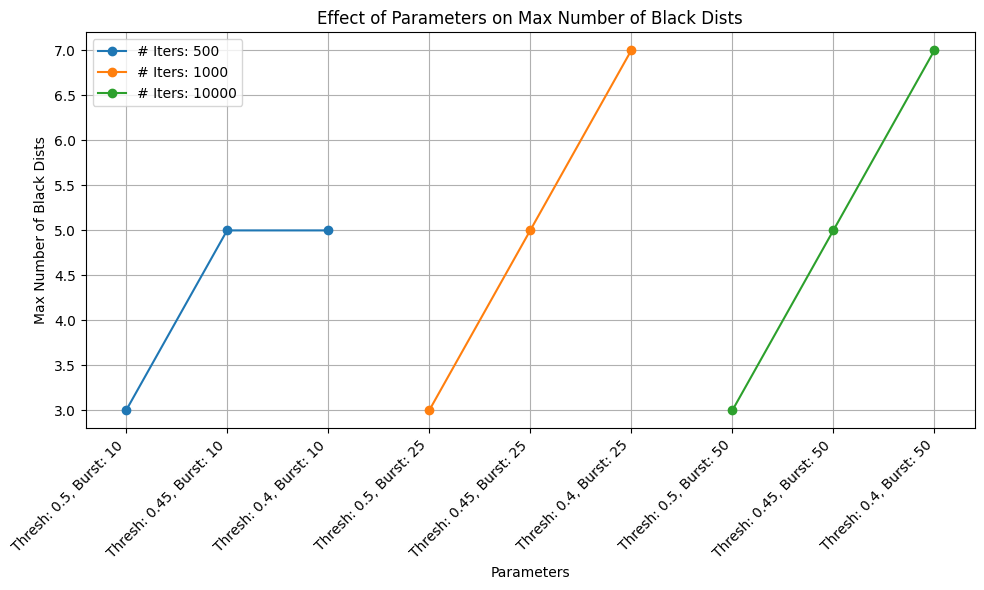

<Figure size 640x480 with 0 Axes>

In [263]:
# Empty list to store dictionaries
data = []

# ---------------- Len = 10 ----------------
# iters = 500, threshold = 0.5, burst_len=10
data.append({'iters': 500, 'threshold': df_GA_bvap50['threshold'][0], 'burst_len': df_GA_bvap50['burst_len'][0], 'max_black_dists': df_GA_bvap50['Maximum'].unique().max()})

# iters = 500, threshold = 0.45, burst_len=10
data.append({'iters': 500, 'threshold': df_GA_bvap45['threshold'][0], 'burst_len': df_GA_bvap45['burst_len'][0], 'max_black_dists': df_GA_bvap45['Maximum'].unique().max()})

# iters = 500, threshold = 0.4, burst_len=10
data.append({'iters': 500, 'threshold': df_GA_bvap40['threshold'][0], 'burst_len': df_GA_bvap40['burst_len'][0], 'max_black_dists': df_GA_bvap40['Maximum'].unique().max()})

# ---------------- Len = 25 ----------------
# iters = 1000, threshold = 0.5, burst_len=25
data.append({'iters': 1000, 'threshold': df_GA_bvap50i1000l25['threshold'][0], 'burst_len': df_GA_bvap50i1000l25['burst_len'][0], 'max_black_dists': df_GA_bvap50i1000l25['Maximum'].unique().max()})

# iters = 1000, threshold = 0.45, burst_len=25
data.append({'iters': 1000, 'threshold': df_GA_bvap45i1000l25['threshold'][0], 'burst_len': df_GA_bvap45i1000l25['burst_len'][0], 'max_black_dists': df_GA_bvap45i1000l25['Maximum'].unique().max()})

# iters = 1000, threshold = 0.4, burst_len=25
data.append({'iters': 1000, 'threshold': df_GA_bvap40i1000l25['threshold'][0], 'burst_len': df_GA_bvap40i1000l25['burst_len'][0], 'max_black_dists': df_GA_bvap40i1000l25['Maximum'].unique().max()})

# ---------------- Len = 50 ----------------
# iters = 10000, threshold = 0.5, burst_len=50
data.append({'iters': 10000, 'threshold': df_GA_bvap50i10000l50['threshold'][0], 'burst_len': df_GA_bvap50i10000l50['burst_len'][0], 'max_black_dists': df_GA_bvap50i10000l50['Maximum'].unique().max()})

# iters = 10000, threshold = 0.45, burst_len=50
data.append({'iters': 10000, 'threshold': df_GA_bvap45i10000l50['threshold'][0], 'burst_len': df_GA_bvap45i10000l50['burst_len'][0], 'max_black_dists': df_GA_bvap45i10000l50['Maximum'].unique().max()})

# iters = 10000, threshold = 0.4, burst_len=50
data.append({'iters': 10000, 'threshold': df_GA_bvap40i10000l50['threshold'][0], 'burst_len': df_GA_bvap40i10000l50['burst_len'][0], 'max_black_dists': df_GA_bvap40i10000l50['Maximum'].unique().max()})

# ------------------ Plot ------------------
iters = [entry['iters'] for entry in data]
threshold = [entry['threshold'] for entry in data]
burst_len = [entry['burst_len'] for entry in data]
max_black_dists = [entry['max_black_dists'] for entry in data]


plt.figure(figsize=(10, 6))

# For each set of iterations
current_iters = None
for i in range(len(iters)):
    if iters[i] != current_iters:
        if current_iters is not None:
            plt.plot(range(i - count, i), max_black_dists[i - count:i], marker='o', linestyle='-', label=f"# Iters: {current_iters}")
        current_iters = iters[i]
        count = 1
    else:
        count += 1

plt.plot(range(len(iters) - count, len(iters)), max_black_dists[len(iters) - count:], marker='o', linestyle='-', label=f"# Iters: {current_iters}")

plt.xticks(range(len(iters)), [f"Thresh: {th}, Burst: {bl}" for th, bl in zip(threshold, burst_len)], rotation=45, ha='right')
plt.xlabel('Parameters')
plt.ylabel('Max Number of Black Dists')
plt.title('Effect of Parameters on Max Number of Black Dists')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("./output/short-burst/sb-analysis.png")